# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [77]:
%matplotlib inline
#%pip install seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

np.random.seed(100)
A = np.random.randint(0, 100, size=(200, 50))
A

array([[ 8, 24, 67, ..., 63, 53, 27],
       [56, 30, 48, ..., 94, 98, 42],
       [84, 95, 76, ...,  8, 89, 72],
       ...,
       [80, 89, 97, ..., 75,  5, 64],
       [24, 95, 35, ..., 17, 56, 27],
       [99, 53, 77, ..., 49, 54, 43]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [59]:
# small_A = np.array([[1,2,3],[1,2,3],[1,2,3],[1,2,3]])
new_A = np.random.permutation(A.T).T
new_A

array([[14, 98, 19, ..., 94, 24,  2],
       [48, 86, 38, ..., 71, 30, 83],
       [12, 10, 20, ..., 95, 95,  6],
       ...,
       [72, 21,  2, ..., 32, 89, 79],
       [47, 26, 70, ..., 82, 95, 40],
       [13, 21, 31, ...,  7, 53, 68]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [60]:
new_A = A[A[:,0::2].sum(axis = 1) > A[:,1::2].mean()]
new_A

array([[ 8, 24, 67, ..., 63, 53, 27],
       [56, 30, 48, ..., 94, 98, 42],
       [84, 95, 76, ...,  8, 89, 72],
       ...,
       [80, 89, 97, ..., 75,  5, 64],
       [24, 95, 35, ..., 17, 56, 27],
       [99, 53, 77, ..., 49, 54, 43]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [61]:
np.argmax(A.max(axis = 1) - A.min(axis = 1))

8

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [62]:
new_A = np.argsort(np.argsort(A, axis=None)).reshape(A.shape) + 1
new_A

array([[ 852, 2424, 6686, ..., 6284, 5301, 2708],
       [5596, 2957, 4807, ..., 9448, 9831, 4243],
       [8435, 9534, 7654, ...,  869, 8937, 7280],
       ...,
       [7993, 8980, 9739, ..., 7529,  599, 6411],
       [2404, 9575, 3509, ..., 1725, 5613, 2668],
       [9912, 5305, 7728, ..., 4887, 5381, 4325]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [63]:
s = np.array([[1,2,3],[1,2,3],[5,3,3],[1,2,3]])
new_A = (s - s.min(axis = 1).reshape(-1,1)) / (s.max(axis = 1).reshape(-1,1) - s.min(axis = 1).reshape(-1,1))
new_A

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ],
       [1. , 0. , 0. ],
       [0. , 0.5, 1. ]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [64]:
base = A.reshape(1, *A.shape)
new_A = np.concatenate((base, 2*base, 3*base, 4*base, 5*base, 6*base, 7*base, 8*base, 9*base, 10*base))
print(new_A.shape)
new_A

(10, 200, 50)


array([[[  8,  24,  67, ...,  63,  53,  27],
        [ 56,  30,  48, ...,  94,  98,  42],
        [ 84,  95,  76, ...,   8,  89,  72],
        ...,
        [ 80,  89,  97, ...,  75,   5,  64],
        [ 24,  95,  35, ...,  17,  56,  27],
        [ 99,  53,  77, ...,  49,  54,  43]],

       [[ 16,  48, 134, ..., 126, 106,  54],
        [112,  60,  96, ..., 188, 196,  84],
        [168, 190, 152, ...,  16, 178, 144],
        ...,
        [160, 178, 194, ..., 150,  10, 128],
        [ 48, 190,  70, ...,  34, 112,  54],
        [198, 106, 154, ...,  98, 108,  86]],

       [[ 24,  72, 201, ..., 189, 159,  81],
        [168,  90, 144, ..., 282, 294, 126],
        [252, 285, 228, ...,  24, 267, 216],
        ...,
        [240, 267, 291, ..., 225,  15, 192],
        [ 72, 285, 105, ...,  51, 168,  81],
        [297, 159, 231, ..., 147, 162, 129]],

       ...,

       [[ 64, 192, 536, ..., 504, 424, 216],
        [448, 240, 384, ..., 752, 784, 336],
        [672, 760, 608, ...,  64, 712, 576

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [65]:
new_A = np.concatenate((A[:,0::2], A[:,1::2]), axis = 1)
new_A

array([[ 8, 67, 79, ..., 19, 63, 27],
       [56, 48, 39, ..., 38, 94, 42],
       [84, 76, 58, ..., 20,  8, 72],
       ...,
       [80, 97,  4, ...,  2, 75, 64],
       [24, 35, 79, ..., 70, 17, 27],
       [99, 77, 65, ..., 31, 49, 43]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [66]:
len(A[np.all(A > 5, axis = 1)])

9

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [67]:
new_A = np.mean(np.split(A, 10), axis = 0)
print(new_A.shape)
new_A

(20, 50)


array([[42.2, 42.4, 49.5, 69.2, 51.5, 53.9, 41.9, 47.8, 63.8, 46.4, 50.9,
        65.7, 59.2, 41.5, 44.3, 55.2, 57.7, 72.4, 48.4, 46.5, 49.2, 61.5,
        46.3, 36.5, 62.7, 42. , 57.4, 48.7, 61.3, 63.6, 57.6, 65.9, 50. ,
        46.5, 48.7, 49.7, 54.8, 59.9, 65.5, 40.6, 42.5, 37.8, 62.7, 41.1,
        40.5, 49.2, 42.4, 64. , 55.9, 35.7],
       [52.8, 44.1, 50.6, 57.7, 35.8, 68.8, 40.5, 60. , 47. , 43.3, 52. ,
        41.7, 42.9, 47.9, 54.5, 50.9, 52.6, 34.7, 62.8, 56.2, 59.2, 41. ,
        31.6, 69.8, 46.4, 34. , 49.3, 38.5, 51.6, 45.2, 52.8, 58.1, 37.6,
        52. , 41. , 47.9, 66.9, 35.3, 25.1, 45.8, 57.3, 48.5, 49.2, 52.6,
        56. , 40.1, 49.8, 65.3, 50.5, 39.9],
       [40.2, 48.4, 46.6, 53.9, 57.5, 56.7, 39.1, 31.5, 43. , 45.9, 41.8,
        38. , 52.6, 51.2, 58.4, 44.1, 27.6, 30.6, 34.2, 54.8, 49.6, 50.8,
        33.6, 54. , 60.4, 57.2, 69.5, 67.6, 54.3, 59.9, 42.3, 41.9, 41.5,
        33.4, 59.5, 36.6, 48.5, 46.5, 44.8, 44.4, 60.4, 32.8, 56.8, 47.4,
        57.3, 50.3, 47

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [68]:
_, ind = np.unique(A, return_index = True)
new_A = A.reshape((1, -1))[0][np.sort(ind)]
new_A

array([ 8, 24, 67, 87, 79, 48, 10, 94, 52, 98, 53, 66, 14, 34, 15, 60, 58,
       16,  9, 93, 86,  2, 27,  4, 31,  1, 13, 83, 91, 59,  7, 49, 47, 65,
       61, 55, 71, 80, 19, 63, 56, 30, 39, 38, 44, 18, 64, 74, 17, 72, 68,
       50, 78,  0, 57, 76,  3, 70, 84, 43, 36,  5, 42, 95, 33, 22, 62, 35,
       23, 21, 25, 54,  6, 37, 51, 45, 89, 12, 82, 92, 20, 73, 90, 77, 40,
       28, 96, 81, 11, 99, 29, 26, 85, 32, 41, 88, 46, 69, 75, 97])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [69]:
np.linalg.norm(A - np.mean(A, axis = 0), axis = 1)

array([224.67575231, 193.51639123, 203.7018745 , 226.40665554,
       196.85264457, 196.52547844, 204.83225741, 190.35578183,
       204.3090641 , 217.80919098, 214.46639288, 209.98017448,
       187.61418836, 207.69719227, 205.63453911, 187.61029736,
       201.43426639, 201.57818254, 213.76604893, 193.06665604,
       199.98058324, 190.27368098, 198.158784  , 207.40854292,
       209.26092247, 204.31016537, 193.75854478, 210.42880904,
       200.07477021, 206.282776  , 188.39600228, 218.0238374 ,
       196.13672189, 191.69317587, 196.22460008, 200.74629181,
       218.32352982, 211.44922245, 210.27064387, 203.85817049,
       184.38970599, 201.19752403, 212.50838495, 207.60138168,
       168.54054015, 207.2534045 , 187.26201877, 196.78115681,
       203.56022125, 217.25867917, 190.71655323, 191.36173514,
       217.28732976, 194.58824136, 212.07961636, 211.11815098,
       192.83693545, 206.30328081, 177.76302674, 200.28954959,
       215.70890959, 193.40569711, 197.49699662, 218.32

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [70]:
new_A = np.where(A < 50, A * 2, A * 3)
new_A

array([[ 16,  48, 201, ..., 189, 159,  54],
       [168,  60,  96, ..., 282, 294,  84],
       [252, 285, 228, ...,  16, 267, 216],
       ...,
       [240, 267, 291, ..., 225,  10, 192],
       [ 48, 285,  70, ...,  34, 168,  54],
       [297, 159, 231, ...,  98, 162,  86]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [71]:
flat_A = A.reshape((1, -1))[0]
def moving_avg(x, n):
    return np.convolve(x, np.ones(n)/n, mode='valid')
m_avg_3 = moving_avg(flat_A, 3)
m_avg_5 = moving_avg(flat_A, 5)
m_avg_10 = moving_avg(flat_A, 10)
m_avg_5 = np.concatenate((m_avg_5, np.zeros(m_avg_3.shape[0] - m_avg_5.shape[0])))
m_avg_10 = np.concatenate((m_avg_10, np.zeros(m_avg_3.shape[0] - m_avg_10.shape[0])))
sum = m_avg_3 + m_avg_5 + m_avg_10
print(m_avg_3.shape, sum.shape)
sum

(9998,) (9998,)


array([142.7       , 181.53333333, 201.26666667, ...,  73.26666667,
        41.33333333,  48.66666667])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


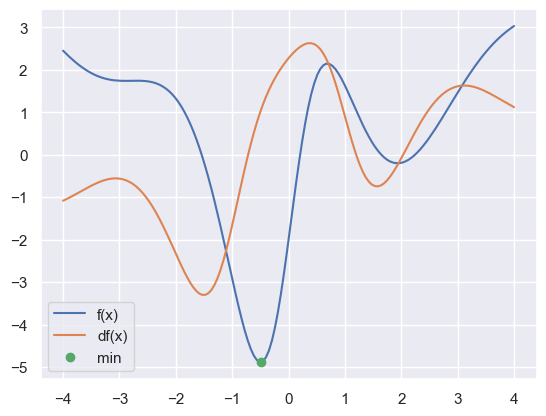

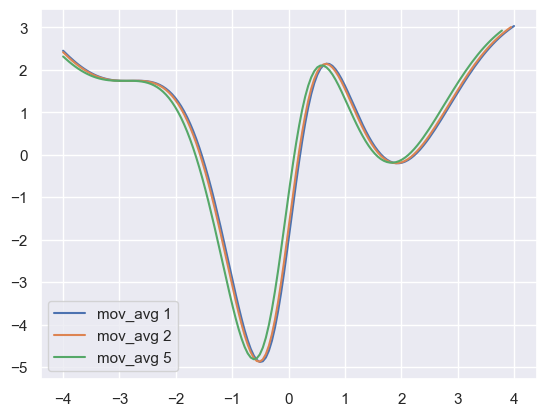

In [72]:
%matplotlib inline
import scipy as sp
from scipy.misc import derivative

def f(x):
    return (5*np.sin(2*x) - np.cos(x)**2 - 1 + np.abs(x)**3 - x**2) / (x**2 + 1)

def df(f, x):
    return derivative(f, x)

x = np.linspace(-4, 4, 150)
y = f(x)
dy = df(f, x)
plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label='df(x)')

res = sp.optimize.fmin_bfgs(f, 0, full_output=True)
x_min, y_min = res[0][0], res[1]
plt.plot(x_min, y_min, 'o', label="min") 
plt.legend()
plt.show()

y1, y2, y5 = moving_avg(y, 1), moving_avg(y, 2), moving_avg(y, 5)
plt.plot(x, y1, label="mov_avg 1")
plt.plot(x[:len(y2)], y2, label="mov_avg 2")
plt.plot(x[:len(y5)], y5, label="mov_avg 5")


plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [73]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[4, 4, 0, 4, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [74]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1972

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [75]:
%%timeit

UsageError: %%timeit is a cell magic, but the cell body is empty. Did you mean the line magic %timeit (single %)?


# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [76]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.8130587606438753

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.